In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch

%load_ext autoreload
%autoreload 2

sns.set()

In [2]:
parquet_file = 'TCV_LHD_db4ML.parquet.part'
df = pd.read_parquet(parquet_file, engine ='auto')

In [3]:
print(df.head())
print('----------oooo0000oooo----------')
print(df.info())
print(df)

     time            IP        PD           FIR   WP        LDH  pulse
0  0.0206  30409.787109  1.816398  4.077222e+18  0.0  Ip<Ip_MIN    1.0
1  0.0207  30882.741994  1.992211  4.092746e+18  0.0  Ip<Ip_MIN    1.0
2  0.0208  31355.696879  2.016582  4.116485e+18  0.0  Ip<Ip_MIN    1.0
3  0.0209  31856.508747  1.943354  4.101001e+18  0.0  Ip<Ip_MIN    1.0
4  0.0210  32357.321558  1.860389  4.185470e+18  0.0  Ip<Ip_MIN    1.0
----------oooo0000oooo----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615471 entries, 0 to 2615470
Data columns (total 7 columns):
 #   Column  Dtype   
---  ------  -----   
 0   time    float64 
 1   IP      float64 
 2   PD      float64 
 3   FIR     float64 
 4   WP      float64 
 5   LDH     category
 6   pulse   float64 
dtypes: category(1), float64(6)
memory usage: 122.2 MB
None
           time             IP         PD           FIR   WP        LDH  pulse
0        0.0206   30409.787109   1.816398  4.077222e+18  0.0  Ip<Ip_MIN    1.0
1        0.02

In [4]:
df.describe()

,time,IP,PD,FIR,WP,pulse
count,2.615471e+06,2.615471e+06,2.615471e+06,2.615471e+06,2.615471e+06,2.615471e+06
mean,8.427632e-01,-1.670041e+05,1.905961e+00,3.054001e+19,9.269129e+03,8.747921e+01
std,5.341768e-01,1.460525e+05,1.537137e+00,1.550879e+19,6.557237e+03,5.027538e+01
min,9.800076e-03,-4.633848e+05,0.000000e+00,-6.358192e+19,-1.856671e+04,1.000000e+00
25%,3.960001e-01,-2.214231e+05,8.275470e-01,2.038334e+19,4.832910e+03,4.500000e+01
50%,7.846002e-01,-1.779653e+05,1.508994e+00,2.872705e+19,7.645989e+03,8.600000e+01
75%,1.236000e+00,-1.422717e+05,2.565994e+00,3.901274e+19,1.321019e+04,1.310000e+02
max,2.575000e+00,5.219116e+05,1.000000e+01,1.196714e+20,4.367435e+04,1.720000e+02


In [6]:
df['LDH'].values.describe() # values in column LDH

,counts,freqs
categories,,
Ip<Ip_MIN,56371,0.021553
L,1573846,0.601745
D,153393,0.058648
H,830940,0.317702
NaN,921,0.000352


In [7]:
#df.dropna(inplace=True)
#df.drop(df[df['LDH']  == 'Ip<Ip_MIN'].index, inplace = True)
#df_filter = df[ df['LDH'] != 'Ip<Ip_MIN']

mask = df['LDH'] == 'Ip<Ip_MIN'
df_filter = df.drop(index = df[mask].index) #remove Ip<Ip_MIN values 

df_filter = df_filter.dropna() #remove Nan values
df_filter = df_filter.reset_index(drop=True) #reset indexing
df_filter.LDH = df_filter.LDH.cat.remove_categories('Ip<Ip_MIN') #remove Ip<Ip_MIN category

discard_data = len(df.index) - len(df_filter.index) # number of data point that do not contain useful information
print('number of useless data points: ', discard_data)
print('percentage of discarded rows: ', 100-(len(df_filter.index)/len(df.index)*100))
print('size of original data set: ', len(df.index))
print('size of filtered data set: ', len(df_filter.index))

print(len(df_filter.index) + discard_data - len(df.index))

print('data statistical description ')
df.describe()

number of useless data points:  57292
percentage of discarded rows:  2.1905041195256985
size of original data set:  2615471
size of filtered data set:  2558179
0
data statistical description 


,time,IP,PD,FIR,WP,pulse
count,2.615471e+06,2.615471e+06,2.615471e+06,2.615471e+06,2.615471e+06,2.615471e+06
mean,8.427632e-01,-1.670041e+05,1.905961e+00,3.054001e+19,9.269129e+03,8.747921e+01
std,5.341768e-01,1.460525e+05,1.537137e+00,1.550879e+19,6.557237e+03,5.027538e+01
min,9.800076e-03,-4.633848e+05,0.000000e+00,-6.358192e+19,-1.856671e+04,1.000000e+00
25%,3.960001e-01,-2.214231e+05,8.275470e-01,2.038334e+19,4.832910e+03,4.500000e+01
50%,7.846002e-01,-1.779653e+05,1.508994e+00,2.872705e+19,7.645989e+03,8.600000e+01
75%,1.236000e+00,-1.422717e+05,2.565994e+00,3.901274e+19,1.321019e+04,1.310000e+02
max,2.575000e+00,5.219116e+05,1.000000e+01,1.196714e+20,4.367435e+04,1.720000e+02


In [8]:
print('values in LDH column') # to make sure removing actually works
df_filter['LDH'].values.describe() # values in column LDH

values in LDH column


,counts,freqs
categories,,
L,1573846,0.615221
D,153393,0.059962
H,830940,0.324817


In [9]:
keys = df_filter.keys().to_numpy()
number_wrong_data = np.zeros(len(keys) -1 )
counter = 0
for key in keys[1:]:
    number_wrong_data[counter] = (df_filter[key] == 'Ip<Ip_MIN').mean()
    counter = counter + 1

print(keys[6])

pulse


In [10]:
print(number_wrong_data)
print(keys[1:])
df_filter.head()

[0. 0. 0. 0. 0. 0.]
['IP' 'PD' 'FIR' 'WP' 'LDH' 'pulse']


,time,IP,PD,FIR,WP,LDH,pulse
0,0.0257,50076.167327,1.796861,5.006723e+18,0.0,L,1.0
1,0.0258,50372.816198,1.816465,5.024210e+18,0.0,L,1.0
2,0.0259,50640.227687,2.031274,5.114125e+18,0.0,L,1.0
3,0.0260,50907.639176,1.894527,5.160487e+18,0.0,L,1.0
4,0.0261,51078.462437,1.865220,5.162926e+18,0.0,L,1.0


In [11]:
df_filter['LDH'].values
(df_filter['LDH'] == 'Ip<Ip_MIN').mean() # to test Ip<Ip_MIN is actually dropped

0.0

In [12]:
num_pulses=int(max(df_filter['pulse'].values)) # tot number of different pulses == tot number of different experiments
num_rows=len(df_filter['pulse'].values)
pulses = list(range(1, num_pulses+1))
#from 1 to 172 included
data_pulse_separated=[]
for j in range(0,num_pulses):
    data_pulse_separated.append([])
i=0
while i<len(df_filter['pulse'].values):
    J=0
    for j in range(0,num_pulses):
        if(df_filter['pulse'].values[i] == j):
            data_pulse_separated[j].append(df_filter.iloc[i,:].tolist())  #select i-th row of the dataframe and conver to list 
    if(df_filter['pulse'].values[i] == 10): ## change the value if you want to analyze for instance the 10th or 11th pulse
        print("i",i)
        break
    i+=1

#print(data_pulse_separated[1])

i 118742


number of datapoints for this pulse:  6622
*** FEATURE IP ***
max:  425094.72647348
avg:  350918.29642449453
min:  50590.7166171509
*** FEATURE PD ***
max:  7.95973955820908
avg:  1.8326579515536456
min:  0.864268033070094
*** FEATURE FIR ***
max:  5.58942976432914e+19
avg:  3.874280520250725e+19
min:  5.12968111536478e+18
*** FEATURE WP ***
max:  27592.871017454
avg:  17811.706008970494
min:  398.897871873487


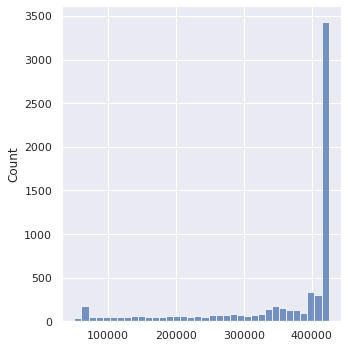

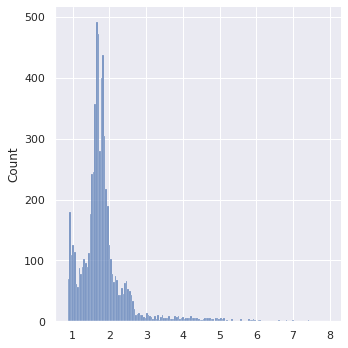

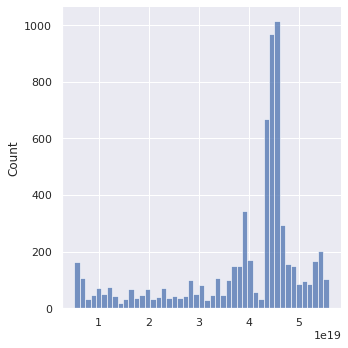

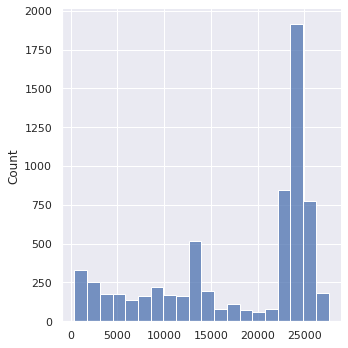

In [25]:
import seaborn as sns
selected_pulse=9       #select the pulse you want to analyze (select an integer from 1 to 9 included)
print("number of datapoints for this pulse: ",len(data_pulse_separated[selected_pulse]))
for i in range(1,5):   #select all features except time(0) and LDH(5) and pulse(6) which is already taken into consideration 
    x=[]
    for k in range(1,len(data_pulse_separated[selected_pulse])-1):
        x.append(data_pulse_separated[selected_pulse][k][i])
    sns.displot(x)
    if(i==1):
        print("*** FEATURE IP ***")
    elif(i==2):
        print("*** FEATURE PD ***")
    elif(i==3):
        print("*** FEATURE FIR ***")
    else:
        print("*** FEATURE WP ***")
    print("max: ",max(x))
    print("avg: ",sum(x)/len(x))
    print("min: ",min(x))

    #x=[elem for elem in x if elem >= 375000] to see the the plot better infor feature 1
    #sns.displot(x)

In [ ]:
## this plot is really time-consuming

percent_data_plots = 0.01
number_rows = len(df_filter.index)
sample_size = int( number_rows * percent_data_plots )
sample = df_filter.sample(10000) # data sample picked at random
print(sample_size)
print(sample['LDH'].values)
#sns.pairplot(sample, diag_kind='kde',hue = 'LDH', markers=["D", "o", "o", "o"])

In [ ]:
# correlation matrices

corrmat = df_filter.corr()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)

In [ ]:
# plot of each feature vs labels
ax1 = df_filter.plot.scatter(x='LDH', y='PD', c='DarkBlue')

#plt.plot(df_filter['LDH'], ls = 'none', marker = 'x')

In [ ]:
df_filter.head(20)

In [ ]:
# testing of functions. This can deleted
features = df_filter.keys().to_numpy()
mask_features = features != 'LDH'
features = features[mask_features]

In [ ]:
### PCA computation
features = df_filter.keys().to_numpy()
# ['time' 'IP' 'PD' 'FIR' 'WP' 'LDH' 'pulse']
print(features)
mask = np.array([False, True, True, True, False, False, True ])
print(features[mask])

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# features 
features = df_filter.keys().to_numpy()
#mask_features_1 = features != 'LDH'
# we remove time, WP, and LDH 
mask_features = np.array([False, True, True, True, False, False, True ])

features = features[mask_features]
print('features in PCA computation', features)

#separate features
x = df_filter.loc[:, features].values
y = df_filter.loc[:,['LDH']].values
x = StandardScaler().fit_transform(x) # Standardizing the features
print(x.shape) # dimension of features
print(y.shape) # dimension of labels

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df_filter[['LDH']]], axis = 1)

In [ ]:
finalDf.head()

In [ ]:
# PCA visualialization
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 12)
ax.set_ylabel('Principal Component 2', fontsize = 12)
ax.set_title('2 component PCA', fontsize = 15)
targets = ['L', 'D', 'H',] # labels to predict
colors = ['r', 'g', 'b',]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['LDH'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
# observe values in column WP
df_filter['WP'].describe()

In [ ]:
data_frame = df_filter.copy()
data_frame['LDH'] = np.where(data_frame['LDH'] == 'L', 0)

In [ ]:
### -----------------------
e column as describe in the paper:
### Classification of tokamak plasma confinement states with convolutional
### recurrent neural networks

In [ ]:
df_filter.head()

In [ ]:
interval_plot = 1000
plt.plot(df_filter.time[:interval_plot:], df_filter.IP[:interval_plot:], ls = '-', lw = 0.80, c = 'k', label ='IP')
plt.legend()
plt.show()

In [ ]:
# plot of quantities vs time every 100 time steps

interval_plot = 100
plt.plot(df_filter.time[:interval_plot:], df_filter.IP[:interval_plot:], ls = '-', lw = 0.80, c = 'k', label ='IP')
plt.legend()
plt.show()

plt.plot(df_filter.time[:interval_plot:], df_filter.PD[:interval_plot:], ls = '-', lw = 1, c = 'b', label ='PD')
plt.legend()
plt.show()

plt.plot(df_filter.time[:interval_plot:], df_filter.FIR[:interval_plot:], ls = '-', lw = 1, c = 'red', label ='FIR')
plt.legend()
plt.show()

plt.plot(df_filter.time[:interval_plot:], df_filter.WP[:interval_plot:], ls = '-', lw = 1, c = 'green', label ='WP')
plt.legend()
plt.show()

plt.plot(df_filter.time[:interval_plot:], df_filter.pulse[:interval_plot:], ls = '-', lw = 1, c = 'magenta', label ='pulse')
plt.legend()
plt.show()

In [ ]:
# rolling average
step_average = 20

plt.plot(df_filter.IP.rolling(window = step_average).mean(), ls = '-', lw = 0.80, c = 'k', label ='moving mean IP')
plt.legend(loc = 'best')
plt.show()

plt.plot(df_filter.PD.rolling(window = step_average).mean(), ls = '-', lw = 0.80, c = 'b', label ='moving mean PD')
plt.legend(loc = 'best')
plt.show()

plt.plot(df_filter.FIR.rolling(window = step_average).mean(), ls = '-', lw = 0.80, c = 'red', label ='moving mean FIR')
plt.legend(loc = 'best')
plt.show()

plt.plot(df_filter.WP.rolling(window = step_average).mean(), ls = '-', lw = 0.80, c = 'green', label ='moving mean WP')
plt.legend(loc = 'best')
plt.show()

plt.plot(df_filter.pulse.rolling(window = step_average).mean(), ls = '-', lw = 0.80, c = 'magenta', label ='moving mean pulse')
plt.legend(loc = 'best')
plt.show()

In [ ]:
df_filter.IP.rolling(window = step_average).mean().head(30).T

In [ ]:
df_filter.IP.head()